# Занятие 14. Методы обработки текста. Рекуррентные сети и трансформеры
Когда Алан Тьюринг придумал свой знаменитый тест, его целью была оценка способности машины соответствовать человеческому интеллекту. Он мог бы проверить многие вещи, такие как возможность узнавать кошек на фотографиях, играть в шахматы или сочинять музыку, но всё же выбрал лингвистическую задачу. В частности, Тьюринг изобрёл `чатбот`, который способен обмануть собеседника, заставив его думать, что он разговаривает с человеком.

Несмотря на недостатки, тест Тьюринга подчёркивает тот факт, что овладение языком является, наверное, самой замечательной способностью человека разумного. Можем ли мы построить машину, способную читать и записывать на естественном языке? Об этом мы и поговорим на данном занятии.

## Обработка естественного языка
`Обработка естественного языка`, (Natural Language Processing (дальше просто `NLP`)) $-$ это подраздел науки об искусственном интеллекте (и машинного обучения в частности), который занимается изучением и анализом процесса распознавания машинами естественных (человеческих) языков. NLP позволяет применять алгоритмы машинного обучения для текста и речи.

Например, мы можем использовать NLP, чтобы создавать системы вроде распознавания речи, обобщения документов, машинного перевода, выявления спама, распознавания именованных сущностей, ответов на вопросы, автокомплита, предиктивного ввода текста и т.д.

## Задачи NLP
Спектр задач и приложений методов обработки языка очень разнообразен. Посмотрим на примеры задач, которые обычно решают специалисты из этой области.

Одна из задач, где точно не обойтись без методов машинного обучения и искусственного инетеллекта, это `машинный перевод текстов` с одного языка на другой. Действительно, переводить сложные тексты человеческими усилиями очень долго, а при механической обработке детерминированными алгоритмами получается быстро, но неэффективно. Искусственный интеллект мог бы сократить расходы и автоматизировать процесс.

Другая распространённая задача $-$ анализ текстов. Эта задача встречается как в виде классификации текстов по определённым критериям, так и в виде анализа части текстовой информации. Например, анализ тональности позволяет определить эмоциональную окраску комментария к посту в соцсети или отзыва на товар на маркетплейсе.

Однако самой главной целью остаётся научить компьютер разговаривать. Поэтому такие задачи как построение диалоговых систем и систем распознавания речи остаются приоритетными, несмотря на огромные достижения в этой области.

## Методы и подходы в NLP для обработки текста
Как представить текст в удобном для компьютера формате? Нам нужно научиться "готовить" текст для машины, которая понимает числа, но не имеет представления о символах и, тем более, о словах и предложениях.

Здесь очень хорошо помогает знание лингвистики $-$ науки, которая изучает язык как систему. С точки зрения лингвистики, `текст` $-$ некоторая законченная последовательность предложений, связанных по смыслу друг с другом в рамках общего замысла автора. В свою очередь, `предложение` как стуктурная единица текста $-$ это тоже последовательность, но уже из других единиц, `слов`. Мы можем бесконечно долго членить текст, пока не дойдём до неделимого юнита $-$ символа, если говорим о тексте печатном, или звука, если имеется в виду устная речь.

В задаче обработки текста разделение текста на некоторые единицы называется `токенизацией`. Можно сегментировать текст на предложения, можно $-$ на отдельные слова, а можно и на слоги. Цель здесь одна $-$ разбить цельный текст на компоненты, с которыми в дальнейшем мы что-то сможем сделать.




In [1]:
# как правило, для токенизации есть готовые библиотеки
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/agat.local/s.bulganin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
text = '''Нынче ветрено и волны с перехлестом.
Скоро осень, все изменится в округе.
Смена красок этих трогательней, Постум,
чем наряда перемена у подруги.'''
sentences = nltk.sent_tokenize(text) # разбивает текст на предложения
for sentence in sentences:
    print(sentence, end='\n\n')

Нынче ветрено и волны с перехлестом.

Скоро осень, все изменится в округе.

Смена красок этих трогательней, Постум,
чем наряда перемена у подруги.



In [3]:
# или по словам
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(words)

['Нынче', 'ветрено', 'и', 'волны', 'с', 'перехлестом', '.']
['Скоро', 'осень', ',', 'все', 'изменится', 'в', 'округе', '.']
['Смена', 'красок', 'этих', 'трогательней', ',', 'Постум', ',', 'чем', 'наряда', 'перемена', 'у', 'подруги', '.']


Обратите внимание, что знаки пунктуации могут считаться отдельным токеном в одной задаче (и вы будете использовать их для своих целей) и будут считаться мусором в другой задаче.

Обычно одно слово может иметь множество `словоформ` в одном тексте. Например, в предложении "Маша решила помыть кошку, кошка была в шоке" слово "кошка" имеет две разные словоформы, которые отличаются друг от друга только формой падежа, но бывают и сложные случаи. Для человека (особенно для носителя любого синтетического языка (например, русского или венгерского)) это нормально, однако для любого алгоритма это будут два разных слова. Если вдуматься, то для человека это тоже два разных слова, пока он не откинет окончание или не определит, что все они от одного корня. По сути, следующий шаг нормализации текста очень похож на это действие: два метода $-$ лемматизация и стемминг $-$ преследуют цель привести все встречающиеся словоформы к одной, начальной словарной форме.

`Стемминг` $-$ это грубый способ, который отрезает либо всё лишнее от корня слова, либо только окончание. Из-за этого может потеряться достаточно полезная информация. Например, для словоформы "кошкой" стемминг отсечёт окончание "ой" и  постфикс "к" (либо только окончание), оставив только корневую часть $-$ "кош" ("кошк"). А вот для английского языка ситуация может быть ещё хуже: в английском языке прилагательное "good" имеет сравнительную степень "better". Стемминг не сможет отсечь здесь какую-то часть, поскольку нужно сверяться со словарём.

В отличие от стемминга, `лемматизация` старается привести каждое слово к его начальной форме. Это более тонкий процесс по сравнению с стеммингом. Как правило, приведение к начальной форме для каждой части речи выглядит по-своему. Для существительных это приведение слова к единственному числу именительного падежа (сравните "кошками" -> "кошка"), для прилагательных это $-$ к форме единственного числа именительного падежа мужского рода ("красивых" -> "красивый"),  а для глаголов $-$ приведение к инфинитиву ("брала" -> "брать").

Оба способа нацелены на то, чтобы сократить разнообразие форм слов и сократить количество кодировок в результате преобразования всех единиц текста.


In [4]:
# пример стемминга для русскоязычных текстов
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")
text = "Листовые листочки лист листва листве почему так"
tokens = nltk.word_tokenize(text)
stemmed_words = [stemmer.stem(word) for word in tokens]
print(stemmed_words)

['листов', 'листочк', 'лист', 'листв', 'листв', 'поч', 'так']


In [5]:
# пример стемминга для англоязычных текстов
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
text = "The stemmed form of leaves is leaf"
tokens = nltk.word_tokenize(text)
stemmed_words = [stemmer.stem(word) for word in tokens]
print(stemmed_words)

['the', 'stem', 'form', 'of', 'leav', 'is', 'leaf']


In [6]:
# пример лемматизации для русскоязычного текста
# в nltk лемматизатора для ru нет, поэтому используем другой модуль
# !pip install pymorphy3
import pymorphy3

morph = pymorphy3.MorphAnalyzer()
text = "Листовые листочки лист листва листве почему так"
tokens = nltk.word_tokenize(text)
lemmatized_words = [morph.parse(word)[0].normal_form for word in tokens]
print(lemmatized_words)

['листовой', 'листочек', 'лист', 'листва', 'листва', 'почему', 'так']


In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/agat.local/s.bulganin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# для англоязычного текста
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
text = "The lemmatized form of leaves is leaf"
tokens = nltk.word_tokenize(text)
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print(lemmatized_words)

['The', 'lemmatized', 'form', 'of', 'leaf', 'is', 'leaf']


Стоит заметить, что лемматизатор не справился со словом "lemmatized". Причин может быть две: либо в словаре не нашлось нормальной формы слова, либо лемматизатору нужно указать конкретную часть речи для этого слова.

Однако это ещё не все действия, которые связаны с нормализацией текста.

Лингвистика выделяет самостоятельные и служебные части речи. К первым относятся существительные, глаголы, прилагательные и многие другие части речи, которые имеют смысловую нагрузку. Напротив, к служебным частям речи относятся союзы, арктикли, предлоги, то есть те части речи, которые самостоятельной смысловой нагрузки не несут, но могут помочь в распознавании самостоятельных частей речи.

К несчастью, как показали исследователи, именно служебные части речи встречаются в тексте чаще всего. Это плохо для моделей машинного обучения, поскольку, как правило, слова с высокими частотами появления в тексте модель способна запоминать лучше. Специалисты NLP называют такие слова `стоп-словами`, и их удалением лучше озаботиться ещё до лемматизации и стемминга.

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/agat.local/s.bulganin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
print(stopwords.words("russian"))

stop_words = set(stopwords.words("russian"))
sentence = '''«Мороженно!» Солнце. Воздушный бисквит.
Прозрачный стакан с ледяною водою.
И в мир шоколада с румяной зарею,
В молочные Альпы, мечтанье летит.'''

# перед удалением исходный текст лучше всего привести
# к нижнему регистру

words = nltk.word_tokenize(sentence.lower())
without_stop_words = []
for word in words:
    if word not in stop_words:
        without_stop_words.append(word)

print(" ".join(without_stop_words))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Как видите, предлоги и союзы были исключены из этого текста. После этого шага можно токенизировать текст и производить его нормализацию.

## Формы представления текста
Как вам известно, алгоритмы машинного обучения не могут напрямую работать с сырым текстом, поэтому необходимо конвертировать текст в наборы цифр (векторы).

Самая простая и популярная техника для извлечения признаков из текста называется `мешком слов`. Если говорить об этой технике кратко, то мешок слов определяет, сколько раз каждое слово появляется в тексте (то есть его абсолютную частоту).  При этом любая информация о порядке и структуре слов игнорируется. Модель, которая получает на вход мешок слов, учится определять, какие слова и сколько раз встречаются в тексте, но она не сможет распознать, в какой последовательности эти слова расположены.

Рассмотрим простой текст:

<i>Русской ржи от меня поклон,<br>
Ниве, где баба застится.<br>
Друг! Дожди за моим окном,<br>
Беды и блажи на́ сердце…<br></i>

Для того, чтобы составить мешок слов, желательно сначала токенизировать текст, удалить стоп-слова, а затем нормализовать. После этих операций текст будет выглядеть следующим образом:

<i>русский рожь поклон<br>
нива баба заститься<br>
друг дождь окно<br>
беда блажь сердце<br></i>

Кажется, что текст оскудел, однако общий смысл всё равно угадывается. Выпишем все слова в строку, сделав их заголовками столбцов таблицы, а потом посчитаем, сколько раз каждое слово появилось в тексте:

|русский|рожь|поклон|нива|баба|заститься|друг|дождь|окно|беда|блажь|сердце|
|---|---|---|---|---|---|---|---|---|---|---|---|
|1|1|1|1|1|1|1|1|1|1|1|1|

Как видим, получилось, что в этом тексте каждое слово встречается по одному разу. Мы получили мешок слов для одного текста, но в нём мало пользы. Добавим ещё один текст:

<i>Вот опять окно,<br>
Где опять не спят. <br>
Может — пьют вино, <br>
Может — так сидят. <br>
Или просто — рук <br>
Не разнимут двое. <br>
В каждом доме, друг, <br>
Есть окно такое.</i>

А затем преобразуем:

<i>окно<br>
спать<br>
пить вино<br>
сидеть<br>
рука <br>
разнять двое. <br>
дом друг<br>
окно</i>

Теперь расширим и дополним таблицу:

|русский|рожь|поклон|нива|баба|заститься|друг|дождь|окно|беда|блажь|сердце|спать|пить|вино|сидеть|рука|разнять|двое|дом|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|1|1|1|1|1|1|1|1|1|1|1|1|0|0|0|0|0|0|0|0|
|0|0|0|0|0|0|1|0|2|0|0|1|1|1|1|1|1|1|1|1|

Каждая строка полученного мешка слов представляет собой закодированный текст для словаря, составленного из представленного `корпуса` текстов. Рассмотрим применение мешка слов и сопутствующие ему проблемы на примере анализа текстов и определении тональности текста.


## Задача классификации
Классификацию текста, как правило, можно проводить базовыми алгоритмами классического машинного обучения.

Рассмотрим такую задачу: имеется корпус текстов, состоящий из комментариев в соцсети на русском языке; часть этих комментариев токсичны, другая часть $-$ не имеют такой эмоциональной окраски. Мы займёмся определением, какой комментарий можно назвать токсичным, а какой $-$ нет.

In [11]:
import pandas as pd

# подгрузим данные
data = pd.read_csv('data/labeled.csv')
data.head()

/home/agat.local/s.bulganin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


Уже можно заметить, что комментарии в первых строках таблицы достаточно неприятны.

Зато в задачах чистого NLP обычно всегда только один столбец с фичами (это сам текст). Проанализируем сначала распределение комментариев по классам токсичности.

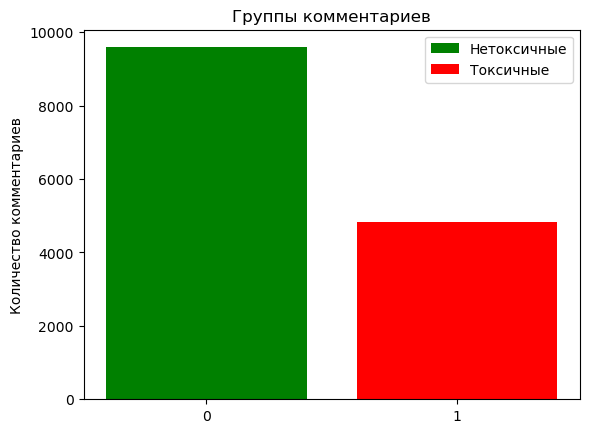

Comment description

      comment                                                               
        count unique                                                top freq
toxic                                                                       
0.0      9586   9586  В шапке были ссылки на инфу по текущему фильму...    1
1.0      4826   4826               Верблюдов-то за что? Дебилы, бл...\n    1

Статистика по комментариям
              toxic
count  14412.000000
mean       0.334860
std        0.471958
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [12]:
import matplotlib.pyplot as plt

desc = data.groupby('toxic').describe()

plt.bar('0', desc['comment']['count'][0], label="Нетоксичные", color='green')
plt.bar('1', desc['comment']['count'][1], label="Токсичные", color='red')
plt.legend()
plt.ylabel('Количество комментариев')
plt.title('Группы комментариев')
plt.show()

print('Comment description\n')
print(desc, end='\n\n')
print('Статистика по комментариям')
print(data.describe())

Когда у нас имеется корпус текстов, то мы можем попробовать сравнивать характеристики текстов ещё до прямого кодирования в мешок слов. Например, как какие комментарии длиннее $-$ токсичные или нетоксичные?

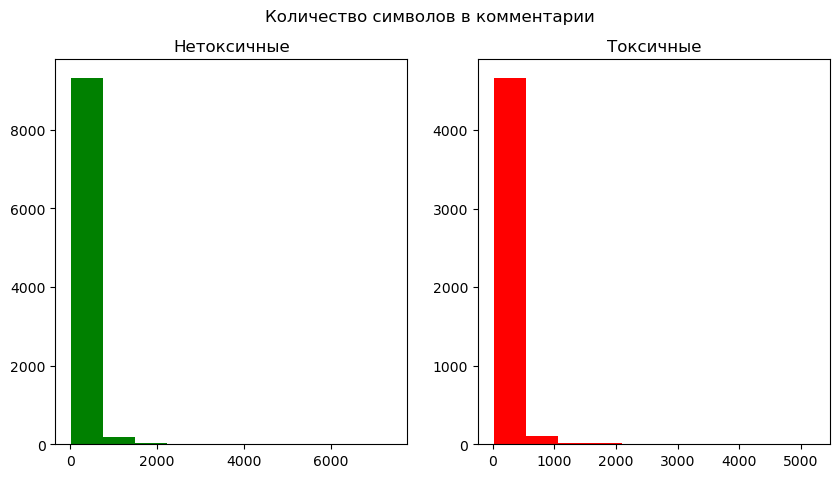

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(data[data['toxic']==0]['comment'].str.len(), color='green')
ax1.set_title('Нетоксичные')

ax2.hist(data[data['toxic']==1]['comment'].str.len(), color='red')
ax2.set_title('Токсичные')

fig.suptitle('Количество символов в комментарии')
plt.show();

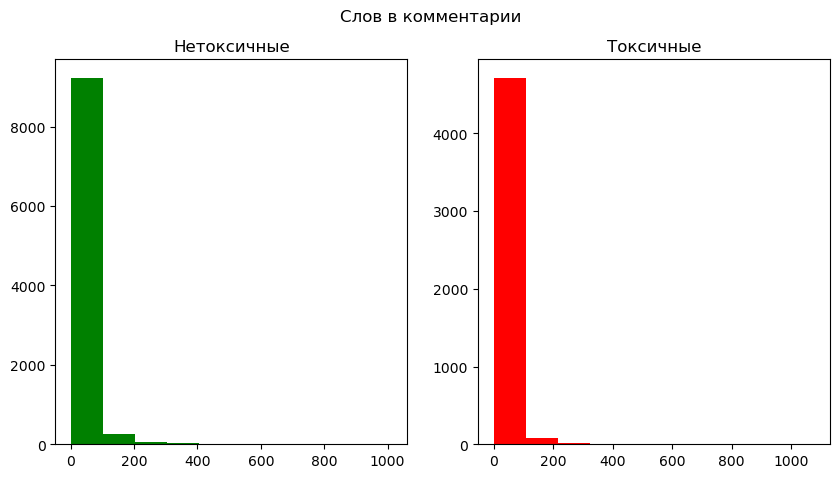

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(data[data['toxic']==0]['comment'].str.split().map(lambda x: len(x)), color='green')
ax1.set_title('Нетоксичные')

ax2.hist(data[data['toxic']==1]['comment'].str.split().map(lambda x: len(x)) ,color='red')
ax2.set_title('Токсичные')

fig.suptitle('Слов в комментарии')
plt.show();

На первый взгляд сказать трудно. Обе группы комментариев обладают схожими распределениями.

Предобработаем тексты и закодируем их в мешки слов.

In [15]:
import numpy as np

# разделим на фичи и целевую переменную
text = np.array(data.comment.values)
target = data.toxic.astype(int).values

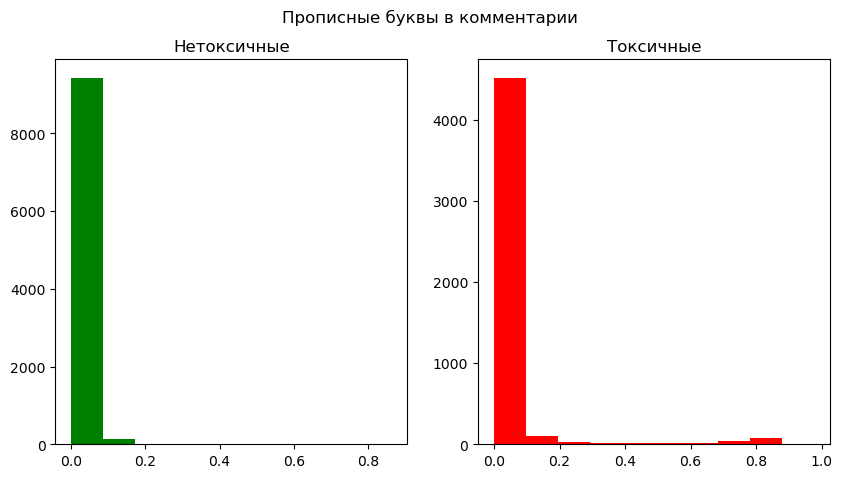

In [16]:
# в этой задаче может быть полезным признаком
# количество заглавных букв в комментарии,
# поскольку есть предположение,
# что капсом выделяют слова, чтобы подчеркнуть эмоциональную составляющую
# текста

def upperCaseRate(string):
    return np.array(list(map(str.isupper, string))).mean()

data['upcaseRate'] = list(map(upperCaseRate, data.comment.values))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(data[data['toxic']==0]['upcaseRate'], color='green')
ax1.set_title('Нетоксичные')

ax2.hist(data[data['toxic']==1]['upcaseRate'], color='red')
ax2.set_title('Токсичные')

fig.suptitle('Прописные буквы в комментарии')
plt.show();

И действительно, токсичные комментарии имеют тенденцию к достаточно высокому проценту содержания прописных букв. Полезный признак.

Теперь очистим тексты. Задача заключается в том, чтобы оставить только кириллические и латинские буквы, а всё остальное удалить. Очевидно, что в комментариях присутствуют управляющие последовательности (`\n`, например). Также удалим стоп-слова и нормализуем текст.

In [17]:
%%time

def cleanText(text):
    import re

    text = text.lower() # приводим все символы к нижнему регистру
    text = re.sub(r"http\S+", "", text) # используем регулярное выражение, чтобы удалить все ссылки
    text = str.replace(text,'ё','е') # заменяем все буквы ё на букву е
    prog = re.compile('[А-Яа-яA-Za-z]+') # задаём регулярное выражение, которое оставляет только кириллицу и латиницу
    words = prog.findall(text) # применяем регулярку

    # удаление стоп-слов
    stopwords = nltk.corpus.stopwords.words('russian')
    words = [w for w in words if w not in stopwords]
    # частеречная разметка, исключая союзы и предлоги
    functionalPos = {'CONJ', 'PRCL'}
    words = [w for w, pos in nltk.pos_tag(words, lang='rus') if pos not in functionalPos]
    # стемминг
    stemmer = SnowballStemmer('russian')
    return ' '.join(list(map(stemmer.stem, words)))

# применим функцию
# map работает аналогично apply, но для списков
nltk.download('averaged_perceptron_tagger_rus')
text = list(map(cleanText, text))

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /home/agat.local/s.bulganin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_rus is already up-to-
[nltk_data]       date!


CPU times: user 19.6 s, sys: 129 ms, total: 19.8 s
Wall time: 19.7 s


In [18]:
# после предподготовки разделим на трейн и тест в соотношении 7:3
# и для надежности перемешаем тексты между собой
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=.3,
                                                    stratify=target, shuffle = True,
                                                    random_state=2024)
print(f'Dim of train: {len(X_train)}', f'\tTarget rate: {y_train.mean()  * 100:.2f}%')
print(f"Dim of test: {len(X_test)}", f'\tTarget rate: {y_test.mean() * 100:.2f}%')

Dim of train: 10088 	Target rate: 33.49%
Dim of test: 4324 	Target rate: 33.49%


Теперь самое интересное. Можно кодировать данные. Мы могли бы использовать для этого знакомый уже вам класс `sklearn.feature_extraction.text.CountVectorizer`, который кодирует текст в мешок слов. Но делать этого не станем, и вот почему.

Слова, которые встречаются достаточно часто (имеют высокую частотность), имеют и наибольшую оценку. В этих словах может быть не так много информационного выигрыша для модели, как в менее частых словах. Один из способов исправить ситуацию – понижать оценку слова, которое часто встречается во всех схожих документах. Это называется `TF-IDF`. Что это такое?

`TF` (`Term Frequency`, частота слова) $-$ отношение числа вхождений слова к общему количеству слов в документе.

$$TF(слово) = \frac{Сколько\spaceраз\spaceслово\spaceпоявилось\spaceв\spaceдокументе}{Общее\spaceколичество\spaceслов\spaceв\spaceдокументе}$$

`IDF` (`inverse document frequency`, обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции.

$$IDF(слово) = log(\frac{Общее\spaceколичество\spaceслов\spaceв\spaceдокументе}{Сколько\spaceраз\spaceслово\spaceпоявилось\spaceв\spaceдокументе})$$

В итоге `TF-IDF` вычисляется так:

$$TF-IDF = TF(слово) * IDF(слово)$$

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf

vectorizer = tfidf()
X_train_vectorised = vectorizer.fit_transform(X_train)
X_test_vectorised = vectorizer.transform(X_test)

print(type(X_train_vectorised), type(X_test_vectorised))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>


In [20]:
# попробуем сделать конвейер обработки
# соединим обработчик и саму модель
# используем в качестве примера логистическую регрессию
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# склеивание в пайплайн
clf_pipeline_LogitReg = Pipeline([
    ("vectorizer", tfidf()),
    ("classifier", LogisticRegression())
])

# посмотрим, какие параметры доступны после склеивания
print('\n'.join(clf_pipeline_LogitReg.get_params().keys()))

memory
steps
verbose
vectorizer
classifier
vectorizer__analyzer
vectorizer__binary
vectorizer__decode_error
vectorizer__dtype
vectorizer__encoding
vectorizer__input
vectorizer__lowercase
vectorizer__max_df
vectorizer__max_features
vectorizer__min_df
vectorizer__ngram_range
vectorizer__norm
vectorizer__preprocessor
vectorizer__smooth_idf
vectorizer__stop_words
vectorizer__strip_accents
vectorizer__sublinear_tf
vectorizer__token_pattern
vectorizer__tokenizer
vectorizer__use_idf
vectorizer__vocabulary
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__l1_ratio
classifier__max_iter
classifier__multi_class
classifier__n_jobs
classifier__penalty
classifier__random_state
classifier__solver
classifier__tol
classifier__verbose
classifier__warm_start


Можно заметить, что теперь нам доступны несколько параметров внутри одного класса. Можно даже подбирать параметры для логистической регрессии и векторизатора вместе.


Будем подбирать для логистической регрессии метрику для регуляризации и значение коэффициента C, а для векторизатора будем искать параметр `min_df`, который определяет минимальное количество документов, в которых встречается слово (если слово не встречается в указанном количестве текстов, то просто не включается в итоговый словарь), и количество `N-грам`. Что это такое? Иногда полезно брать не отдельное слово для включения его в словарь, а словосочетания с этим словом. Например, если в тексте "сегодня быть красивый, завтра быть уставший" брать словосочетания из двух слов (биграммы), то получится набор: "сегодня быть", "быть красивый", "красивый, завтра", "завтра быть", "быть уставший". Мы можем комбинировать N-граммы с отдельными словами, а можем рассматривать их отдельно.

In [21]:
from sklearn import metrics
def plotROC(y_test, probs, title=''):
    if title!='':
        title = ' ('+title+')'
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('ROC'+title)
    plt.plot(fpr, tpr, 'b', label=f'AUC= %0.5f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show();

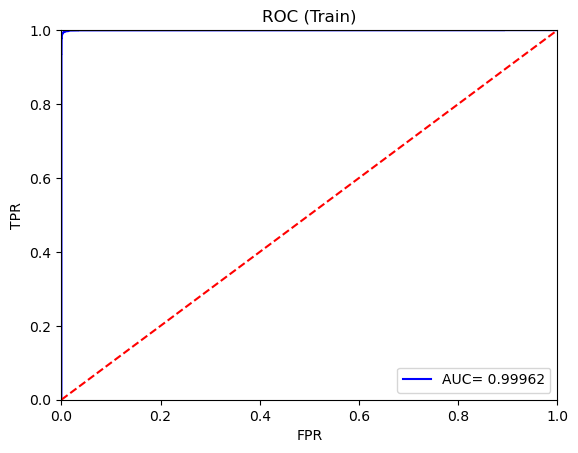

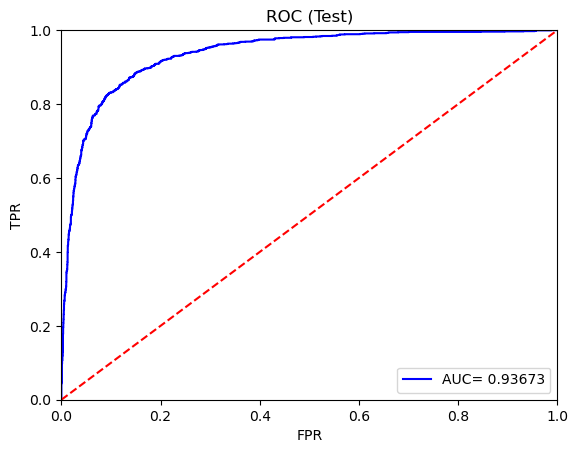

CPU times: user 19.6 s, sys: 17.2 s, total: 36.7 s
Wall time: 8.05 s


In [22]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

parameters = {
              'vectorizer__ngram_range': [(1, 2), (1, 3)], # от 1 слова до биграмм и от 1 слова до триграмм
              'vectorizer__min_df': [0., .2, .4, .6, .8,1],
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }


rndgs_clf_LogitReg = RandomizedSearchCV(clf_pipeline_LogitReg, parameters,
                                        scoring='f1', cv=4, n_jobs=-1)
rndgs_clf_LogitReg.fit(X_train, y_train)

probs = rndgs_clf_LogitReg.predict_proba(X_train)[:,1]
plotROC(y_train, probs, 'Train')

probs = rndgs_clf_LogitReg.predict_proba(X_test)[:,1]
plotROC(y_test, probs, 'Test')

Как можно видеть, построенная модель достаточно хорошо справляется с поставленной задачей и вполне способна выявлять токсичные комментарии.

Однако когда речь заходит о более сложных задачах, например, генерации следующего слова в тексте (и вообще написание нового текста или дополнение уже существующего), базовые модели не подойдут хотя бы по той причине, что у них нет краткосрочной памяти, в которой они могли бы хранить некоторые детали контекста для генерации чего-либо нового. Поэтому, когда мы имеем дело с последовательностями вообще и текстовыми последовательностями в частности, мы обращаемся к специальной архитектуре нейронных сетей $-$ рекуррентным нейросетям.

## Рекуррентные нейроны и слои
До сих пор мы были сосредоточены на нейронных сетях прямого распространения, где активации протекали от входного слоя до выходного слоя. `Рекуррентная нейронная сеть` похожа на сет прямого распространения, но также имеет связи, указывающие в обратном направлении.

Рассмотрим простейшую рекуррентную сеть, состоящую из одного нейрона, который получает входы, производит выход и вместе с тем передаёт выход самому себе.

![](./src/recurrent_neuron.png)

На каждом временном шаге $t$ такой нейрон получает входной сигнал $x_{(t)}$, а также собственный выход из предыдущего временного шага $y_{(t-1)}$. Мы можем представить такую крошечную сеть по оси времени, как это показано на рисунке выше справа. Процесс называется развёртыванием сети во времени.

Можно легко создать слой из рекуррентных нейронов. На каждом временном шаге $t$ каждый нейрон получает входной вектор признаков $x_{t}$ и выходной вектор из предыдущего временного шага $y_{(t-1)}$. Как видите, теперь входы и выходы стали векторами, когда для одного нейрона это было одно число.

![](./src/reccurent_layer.png)

Каждый рекуррентный нейрон имеет два набора весов: один для входов $x_{(t)}$ и один для выходов предыдущего временного шага $y_{(t-1)}$.



Поскольку выход рекуррентного нейрона на временном шаге $t$ $-$ это функция от всех входов предшествующих временных шагов, то можно было бы сказать, что он обладает некоторой формой *памяти*. Часть нейронной сети, которая сохраняет состояние через временные шаги, называется *ячейкой памяти*. Одиночный рекуррентный нейрон или целый слой рекуррентных нейронов представляют собой базовую ячейку, способную узнавать только короткие образы (как правило, длиной только в 10 шагов, но она может меняться в зависимости от задачи).

## Входные и выходные последовательности

![](./src/recurrent_nn.png)

Рассмотрим несколько типов таких сетей.

Например, рекуррентная сеть на рисунке выше в левом верхнем углу может одновременно принимать последовательность входов и порождать последовательность выходов. Она называется `сеть "последовательность в последовательность"`. Как правило, такие сети оказываются полезными для прогнозирования `временных рядов`, как курс акций.

В качестве альтернативы можно использовать сеть из правого верхнего угла, которая принимает последовательность входов и игнорирует все выходы, кроме последнего. Другими словами, это `сеть "последовательность в вектор"`. Например, сети можно передать последовательность слов, соответствующих рецензии на фильм, и она выдаст оценку отношения (например, от -1 до 1).

И наоборот, можно передавать сети один и тот же вектор снова и снова на каждом временном шаге и позволить ей выдать последовательность (левая нижняя на рисунке). Это `сеть "вектор в последовательность"`. Например, входом может быть вектор изображения или выход свёрточной сети, а выходом $-$ подпись для изображения.

Наконец, мы могли бы построить сеть "последовательность в вектор", которая называется `кодировщиком`, а за ней сеть "вектор в последовательность", которая называется "декодировщиком". Называется такая двухшаговая модель "кодировщик-декодировщик" и применяется для сложных задач машинного перевода текста.

## Борьба с проблемой краткосрочной памяти
Из-за трансформаций, которым подвергаются данные при движении через рекуррентную сеть, на каждом временном шаге часть информации утрачивается. Через некоторое время состояние сети практически не содержит следов первых входов.

Чтобы справиться с проблемой, были предложены разнообразные типы ячеек с долговременной памятью. Они оказались настолько успешными, что базовые ячейки больше широко не применяются.



### Ячейка LSTM
Ячейка `долгой краткосрочной памяти` (`Long Short-Term Memory - LSTM`) была предложена в 1997 году Сеппом Хохрайтером и Юргеном Шмидхубером, а потом ещё годами совершенствовалась различными исследователями.

Каким образом работает эта ячейка? Её строение показано на рисунке ниже.

![](./src/lstm.png)

Если не смотреть на то, что находится внутри чёрного ящика ячейки, то в общем LSTM работает как и базовая ячейка памяти, но с одним новшеством: вектор её состояния расщепляется на два отдельных вектора $-$ вектор краткосрочного состояния ($h_{(t)}$ и вектор долгосрочного состояния $c_{(t)}$.

Основная идея работы этой ячейки заключается в том, чтобы сеть могла узнать, что хранить в долгосрочном состоянии, а что $-$ забывать. Во время пересечения ячейки слева-направо долгосрочное состояние $c_{(t-1)}$ проходит через шлюз забывания с отбрасыванием некоторых воспоминаний и затем посредством операции сложения к нему добавляется ряд новых воспоминаний (выбранных входным шлюзом). Результат $c_{(t)}$ отправляется прямо на выход без какой-либо дальнейшей трансформации. Следовательно, на каждом временном шаге одни воспоминания отбрасываются, а другие добавляются. Кроме того, после операции сложения долгосрочное состояние копируется и пропускается через функцию `tanh`, а результат фильтруется выходным шлюзом.

Итогом будет краткосрочное состояние $h_{(t)}$ (которое равно выходу ячейки для данного временного шага).

## Пример построения архитектуры "кодировщик-декодировщик"
Рассмотрим стандартный пример архитектуры "кодировщик-декодировщик" на примере задачи машинного перевода с одного естественного языка на другой. В нашем примере будем строить модель, которая переводит текст с английского языка на русский язык. Начнём пошагово с простого примера, который усовершенствуем в конце.

### Данные
Воспользуемся данными английско-русского словаря и подгрузим их.

In [23]:
# откроем файл на чтение и выгрузим его содержимое
with open('data/rus.txt') as file:
    lines = file.read().split("\n")[:-1]

In [24]:
# спарсим из каждой строки предложение на английском и
# его перевод на русском

import pandas as pd

pairs = {
    "оригинал" : [],
    "перевод" :  []
}
for line in lines:
    english, russian = line.split("\t")[:2]
    russian = "[start] " + russian + " [end]" # добавим метки начала и конца предложения
    pairs["оригинал"].append(english)
    pairs["перевод"].append(russian)

df = pd.DataFrame(pairs)
df.head(20)

,оригинал,перевод
0,Go.,[start] Марш! [end]
1,Go.,[start] Иди. [end]
2,Go.,[start] Идите. [end]
3,Hi.,[start] Здравствуйте. [end]
4,Hi.,[start] Привет! [end]
5,Hi.,[start] Хай. [end]
6,Hi.,[start] Здрасте. [end]
7,Hi.,[start] Здоро́во! [end]
8,Run!,[start] Беги! [end]
9,Run!,[start] Бегите! [end]
